In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal


In [2]:
class QuadState(TypedDict):
    # coefficients
    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str # roots


In [42]:
def show_equation(state: QuadState):
    valB = state['b']
    valC = state['c']
    
    equation = f"{state['a']}x^2"
    
    if valB > 0: equation += f" + {valB}x"
    elif valB < 0: equation += f" - {abs(valB)}x"
    
    if valC > 0: equation += f" + {valC}"
    elif valC < 0: equation += f" - {abs(valC)}"
    
    # edge case
    if state['a'] == 0:
        if valB == 0:
            equation = str(valC)
        else:
            equation = f"{valB}x" + (f" + {valC}" if valC > 0 else f" - {abs(valC)}" if valC < 0 else "")

    return {'equation': equation}

def calculate_discriminant(state: QuadState):
    d = state['b']**2 - (4*state['a']*state['c'])
    return {'discriminant': d}


In [47]:
def real_roots(state: QuadState):
    root1 = (-state['b'] + state['discriminant']**(0.5))/2*state['a']
    root2 = (-state['b'] - state['discriminant']**(0.5))/2*state['a']
    
    return {
        'result': f"Roots are {root1} and {root2}"
    }
    
def same_roots(state: QuadState):
    root = (-state['b'])/2*state['a']
    
    return {
        'result': f"Root is {root}"
    }
def complex_roots(state: QuadState):
    return {
        'result': f"No real roots"
    }


In [49]:
def check_discriminant_condition(state: QuadState) -> Literal['real_roots', 'same_roots', 'complex_roots']:
    if state['discriminant'] > 0:
        return 'real_roots'
    elif state['discriminant'] == 0: 
        return 'same_roots'
    return "complex_roots"


In [54]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('calc_discriminant', calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('same_roots', same_roots)
graph.add_node('complex_roots', complex_roots)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calc_discriminant')

# conditional edges
graph.add_conditional_edges('calc_discriminant', check_discriminant_condition)
graph.add_edge('real_roots', END)
graph.add_edge('same_roots', END)
graph.add_edge('complex_roots', END)


wf = graph.compile()


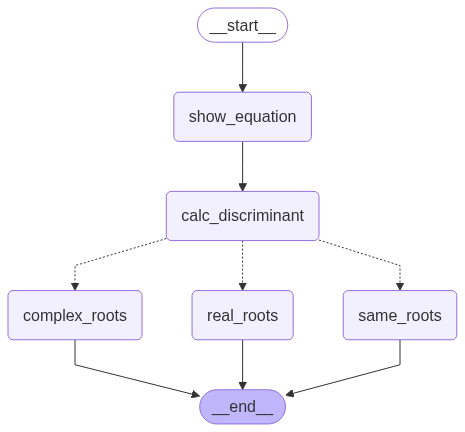

In [55]:
wf


In [58]:
initial_state = {
    'a': -2,
    'b': 5,
    'c': 16
}
wf.invoke(initial_state)


{'a': -2,
 'b': 5,
 'c': 16,
 'equation': '-2x^2 + 5x + 16',
 'discriminant': 153,
 'result': 'Roots are -7.369316876852981 and 17.36931687685298'}